<a href="https://colab.research.google.com/github/Rabo27/Olympic-Analysis-with-python-/blob/main/SumOlymMedals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
ramontanoeiro_summer_olympic_medals_1986_2020_path = kagglehub.dataset_download('ramontanoeiro/summer-olympic-medals-1986-2020')

print('Data source import complete.')

100%|██████████| 9.57k/9.57k [00:00<00:00, 1.98MB/s]

Extracting files...
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import pandas as ps
import seaborn as sn
import matplotlib.pyplot as plt
import plotly.express as plex

# Dataframe to begin with.
medals = ps.read_csv('/content/Country_Medals.csv',sep = ';')
medals.head(10)

,Year,Country_Code,Country_Name,Host_city,Host_country,Gold,Silver,Bronze
0,1932,(USA),United States,Los Angeles,United States,41,32,30
1,1932,(ITA),Italy,Los Angeles,United States,12,12,12
2,1932,(FRA),France,Los Angeles,United States,10,5,4
3,1932,(SWE),Sweden,Los Angeles,United States,9,5,9
4,1932,(JPN),Japan,Los Angeles,United States,7,7,4
5,1932,(HUN),Hungary,Los Angeles,United States,6,4,5
6,1932,(FIN),Finland,Los Angeles,United States,5,8,12
7,1932,(GBR),Great Britain,Los Angeles,United States,4,7,5
8,1932,(GER),Germany,Los Angeles,United States,3,12,5
9,1932,(AUS),Australia,Los Angeles,United States,3,1,1


In [4]:
# Starting with basic checks
#medals.describe()
medals.shape

# So 1344 records.

(1344, 8)

In [5]:
# Checking if country names are still valid
# medals['Country_Name'].unique() # Seem legit including the 'Unified Team','Independent Olympic Participants'

In [6]:
host_is_home = medals.loc[medals['Country_Name']==medals['Host_country']]
host_is_home # Just 28 records

,Year,Country_Code,Country_Name,Host_city,Host_country,Gold,Silver,Bronze
0,1932,(USA),United States,Los Angeles,United States,41,32,30
34,1928,(NED),Netherlands,Amsterdam,Netherlands,6,9,4
62,1924,(FRA),France,Paris,France,13,15,10
89,1920,(BEL),Belgium,Antwerp,Belgium,16,12,14
110,1912,(SWE),Sweden,Stockholm,Sweden,24,24,17
128,1908,(GBR),Great Britain,London,Great Britain,56,51,39
147,1904,(USA),United States,St. Louis,United States,76,78,77
160,1900,(FRA),France,Paris,France,27,38,37
182,1896,(GRE),Greece,Athens,Greece,10,18,19
192,1984,(USA),United States,Los Angeles,United States,83,61,30


In [7]:
host_is_home['Medal_tally'] = host_is_home['Gold']+host_is_home['Silver']+host_is_home['Bronze']
host_is_home

/tmp/ipython-input-1534591416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  host_is_home['Medal_tally'] = host_is_home['Gold']+host_is_home['Silver']+host_is_home['Bronze']


,Year,Country_Code,Country_Name,Host_city,Host_country,Gold,Silver,Bronze,Medal_tally
0,1932,(USA),United States,Los Angeles,United States,41,32,30,103
34,1928,(NED),Netherlands,Amsterdam,Netherlands,6,9,4,19
62,1924,(FRA),France,Paris,France,13,15,10,38
89,1920,(BEL),Belgium,Antwerp,Belgium,16,12,14,42
110,1912,(SWE),Sweden,Stockholm,Sweden,24,24,17,65
128,1908,(GBR),Great Britain,London,Great Britain,56,51,39,146
147,1904,(USA),United States,St. Louis,United States,76,78,77,231
160,1900,(FRA),France,Paris,France,27,38,37,102
182,1896,(GRE),Greece,Athens,Greece,10,18,19,47
192,1984,(USA),United States,Los Angeles,United States,83,61,30,174


**Time for some plots**

<Axes: xlabel='Country_Name', ylabel='Medal_tally'>

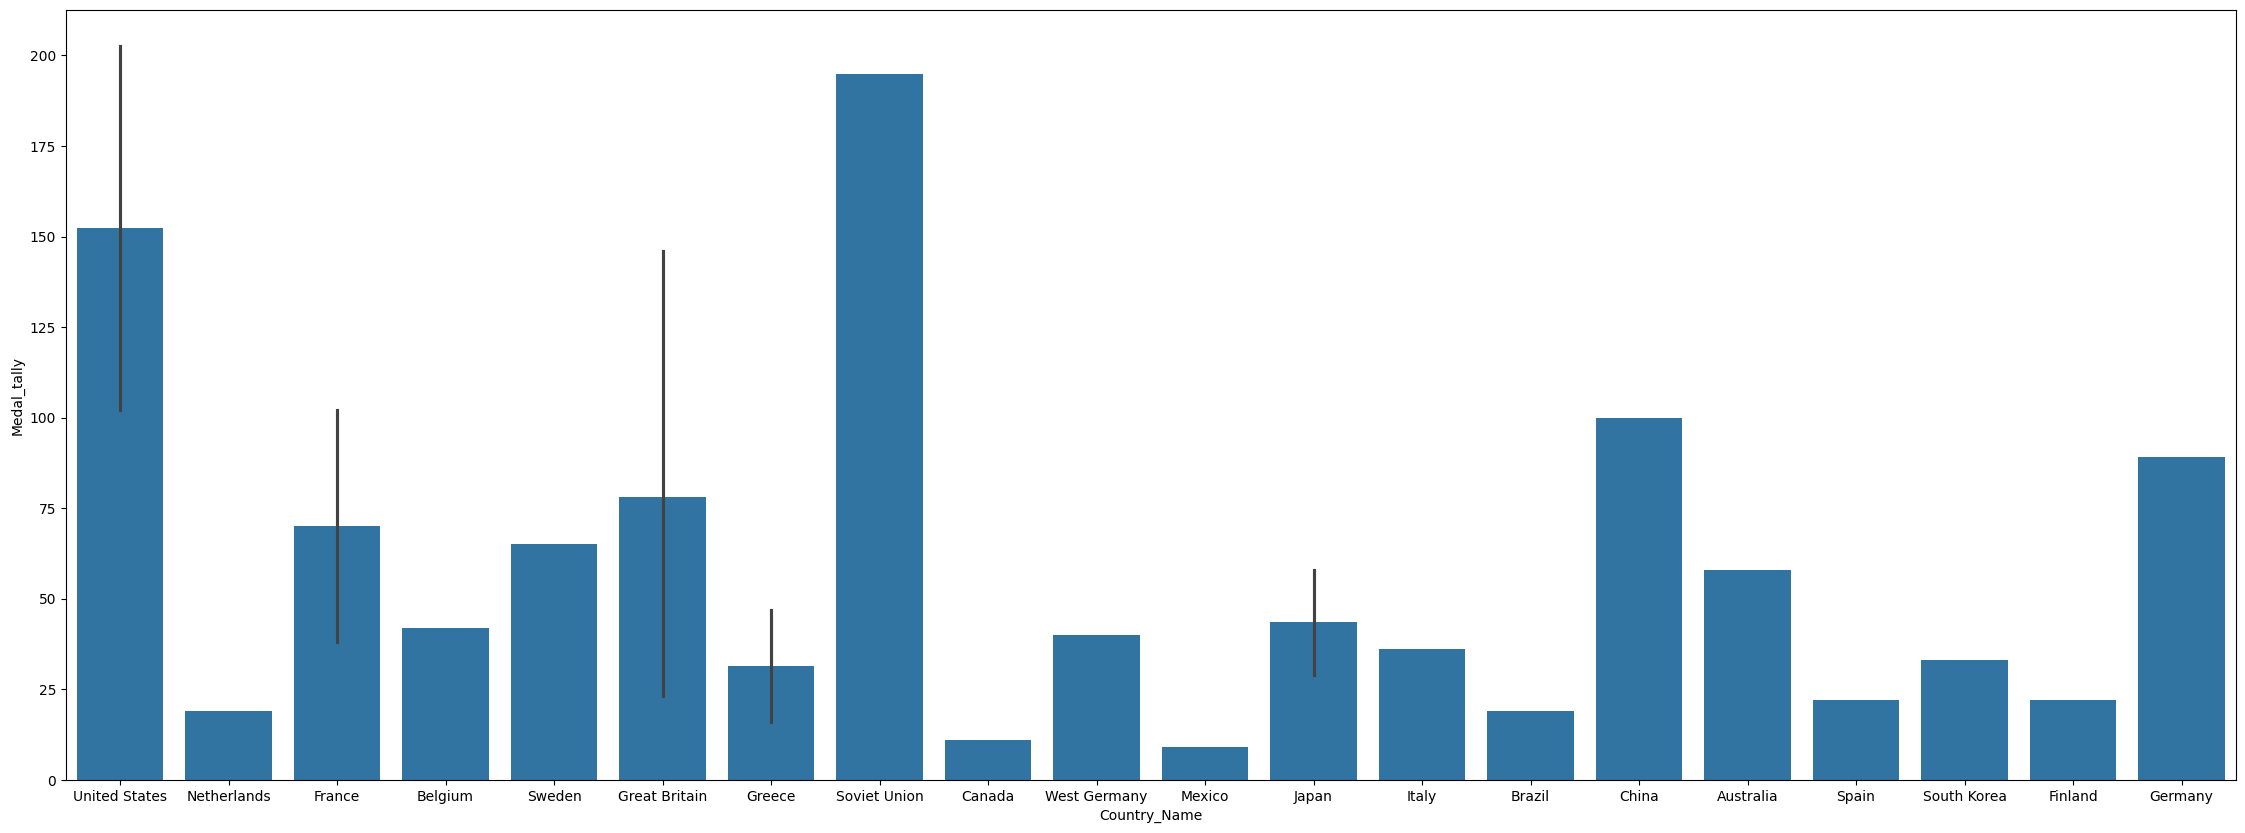

In [8]:

plt.figure(figsize=(28,10))
sn.barplot(x='Country_Name',y='Medal_tally',data=host_is_home)

<Axes: xlabel='Country_Name', ylabel='Year'>

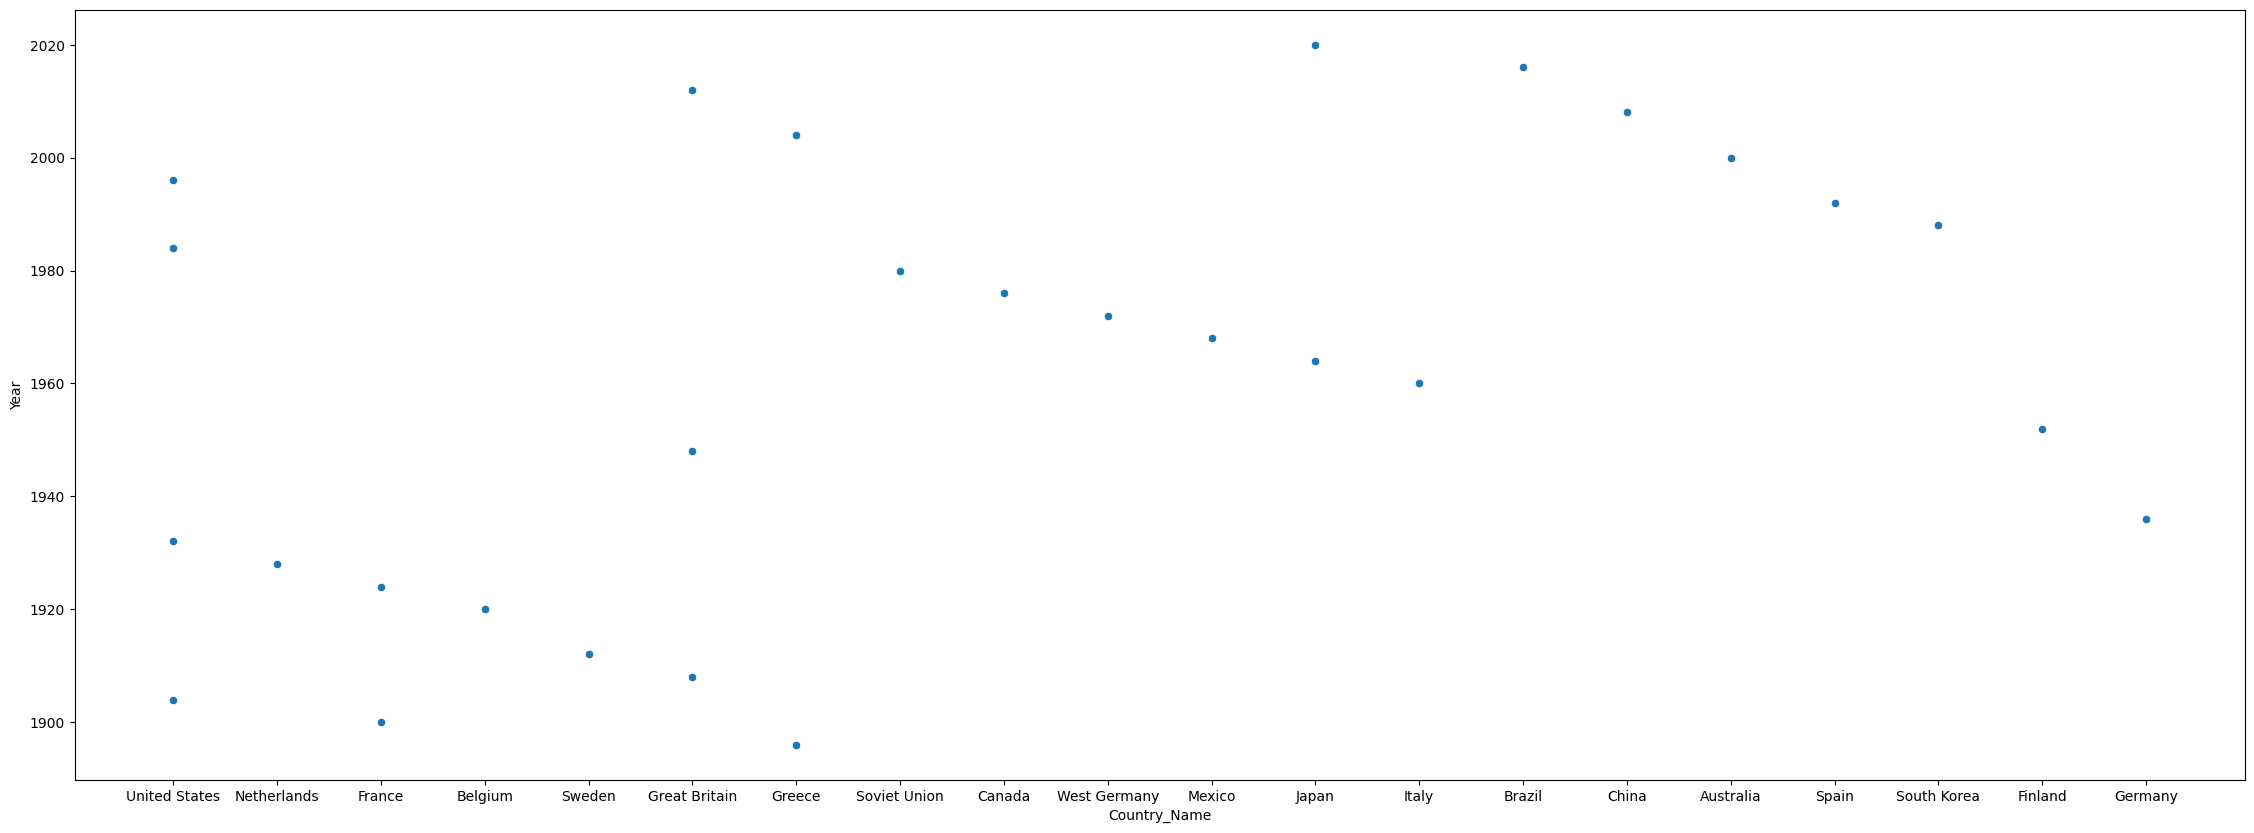

In [9]:
# Scatter plot to understand year counts
plt.figure(figsize=(28,10))
sn.scatterplot(x='Country_Name',y='Year',data=host_is_home)

In [10]:
host_is_home[host_is_home['Country_Name'] == "Japan"]

,Year,Country_Code,Country_Name,Host_city,Host_country,Gold,Silver,Bronze,Medal_tally
410,1964,(JPN),Japan,Tokyo,Japan,16,5,8,29
495,2020,(JPN),Japan,Tokyo,Japan,27,14,17,58


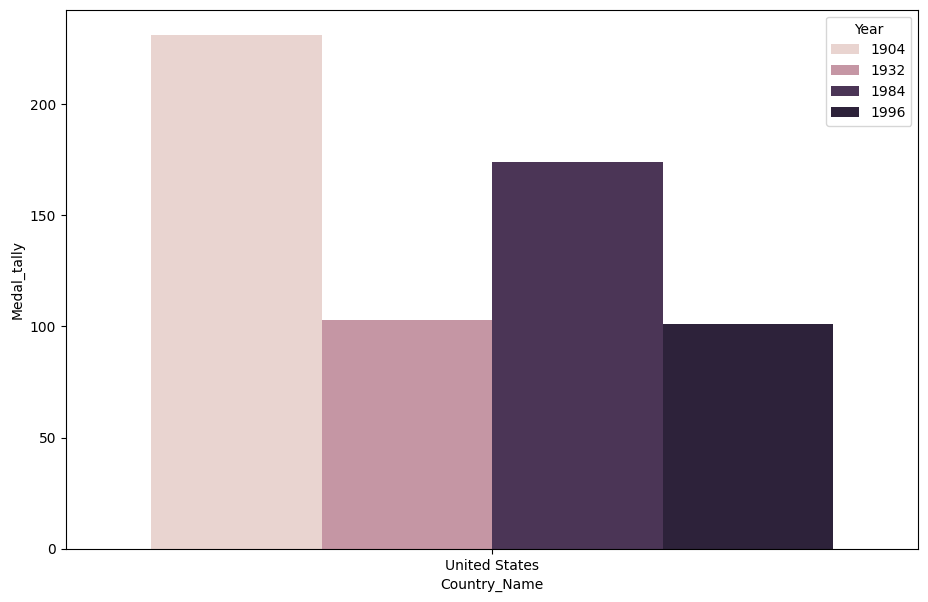

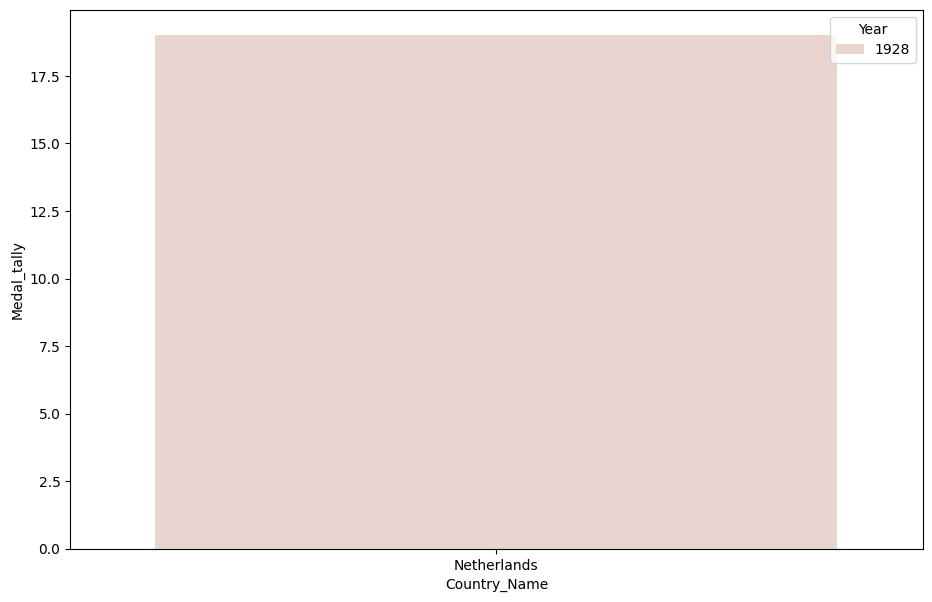

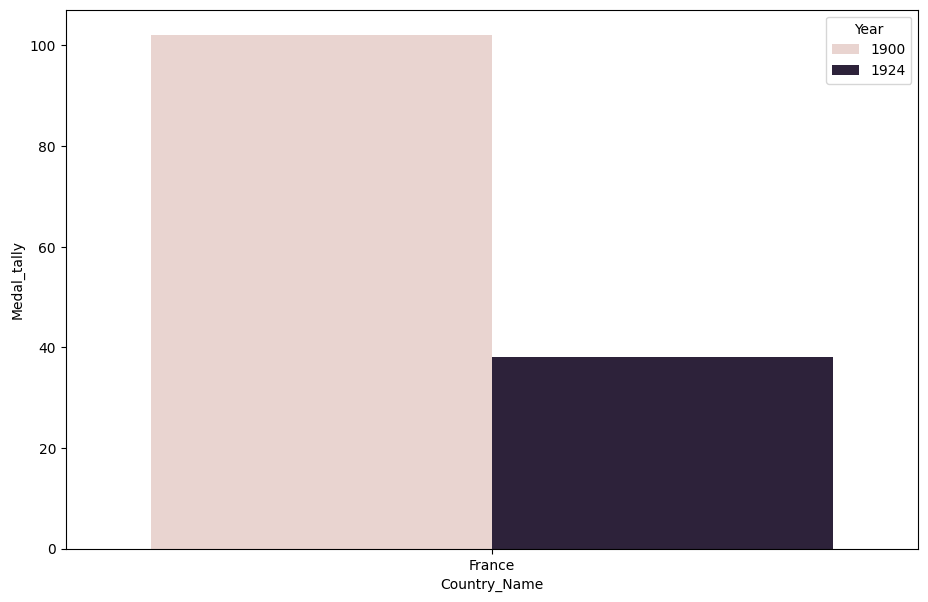

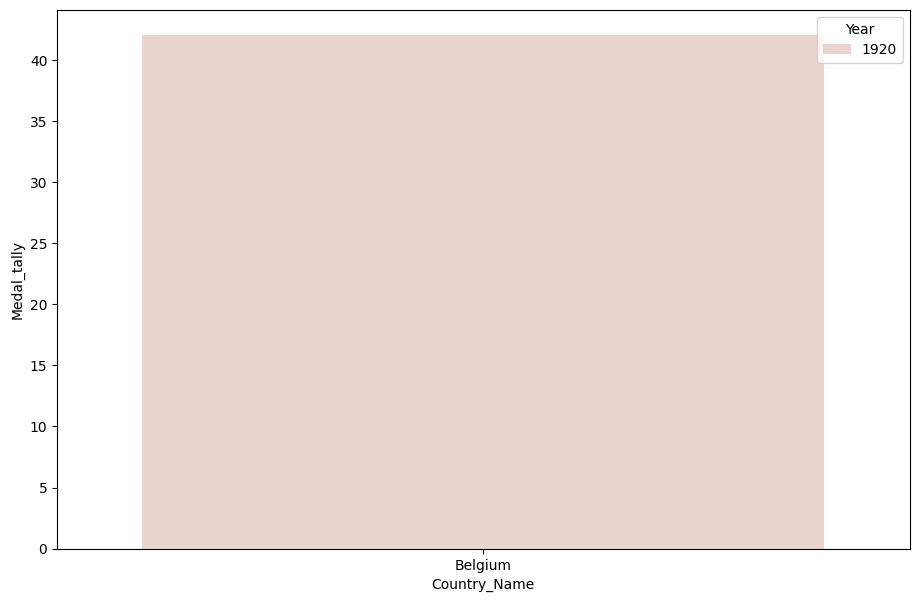

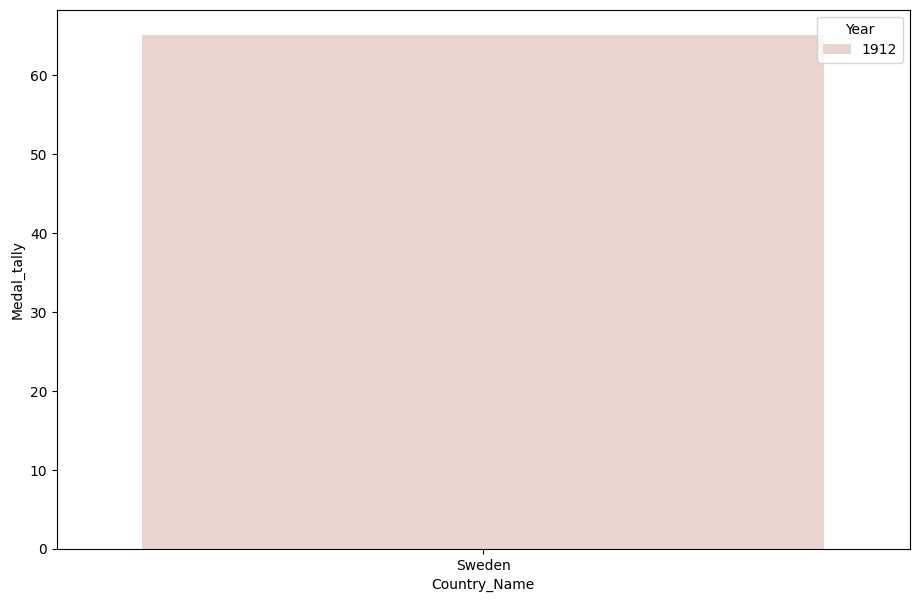

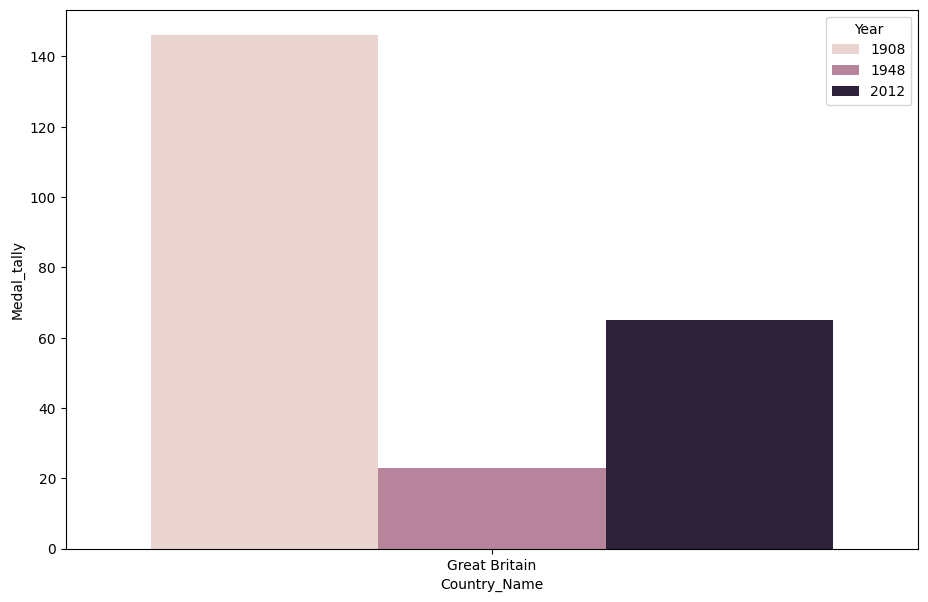

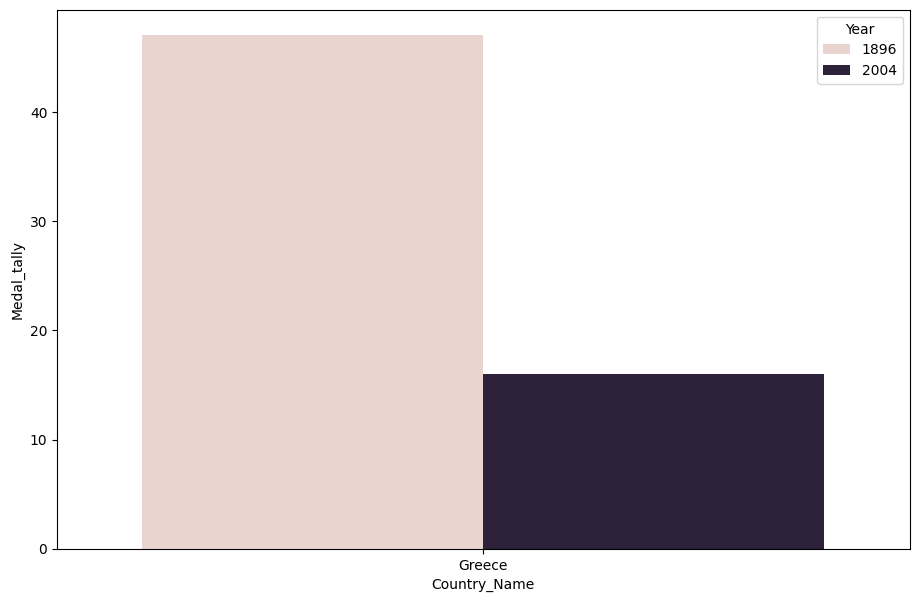

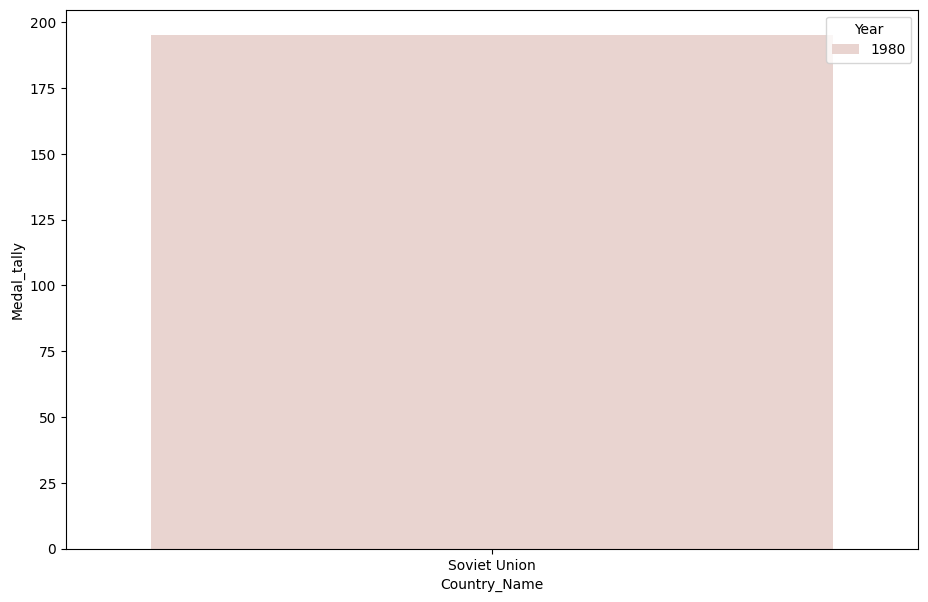

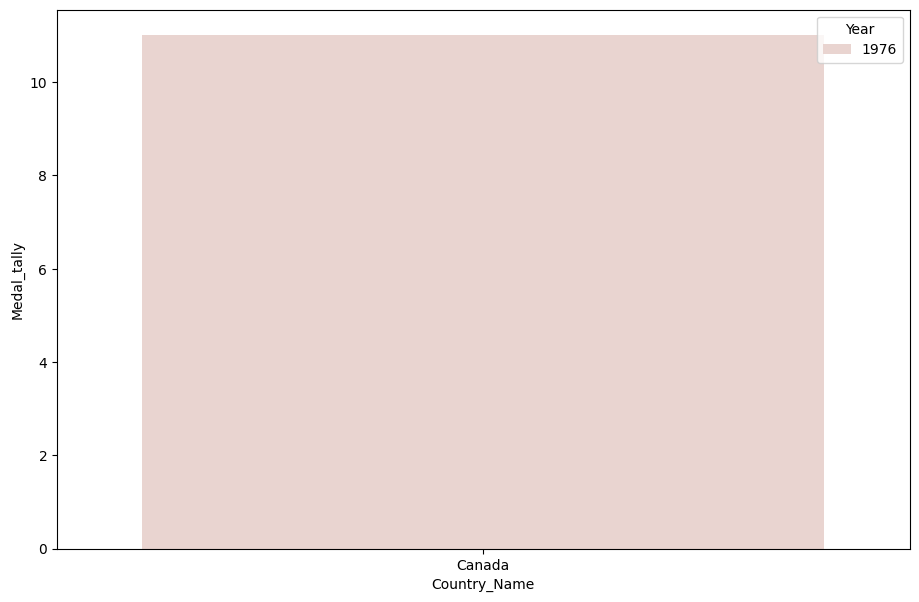

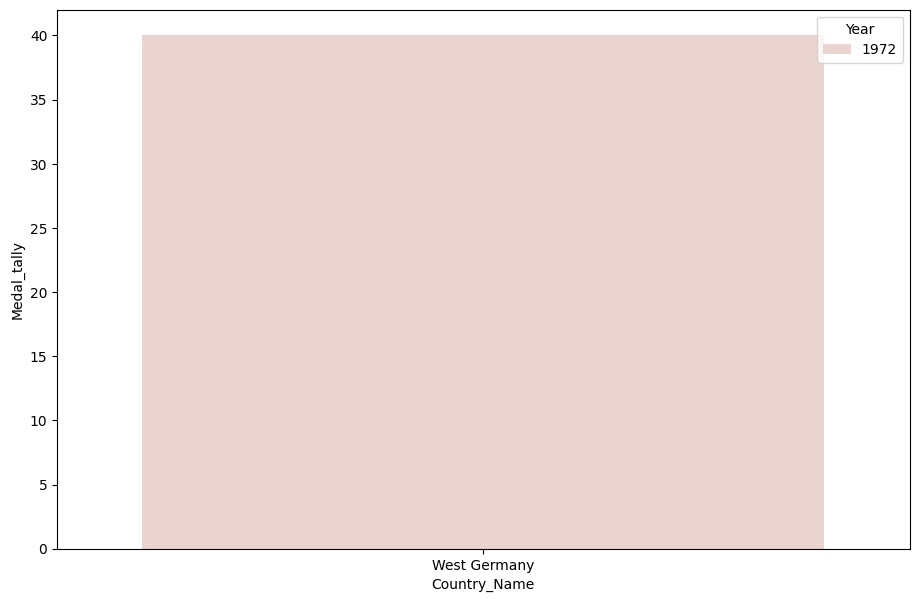

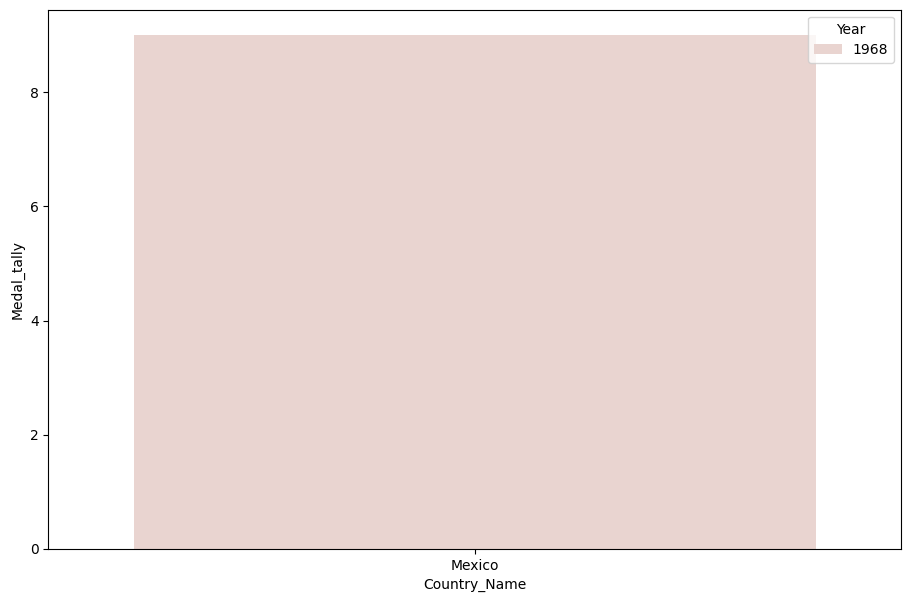

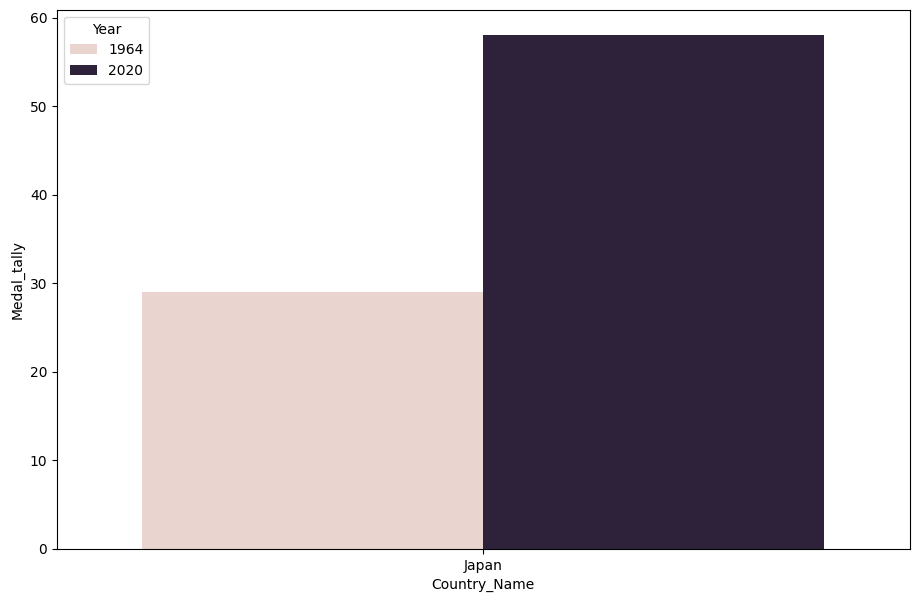

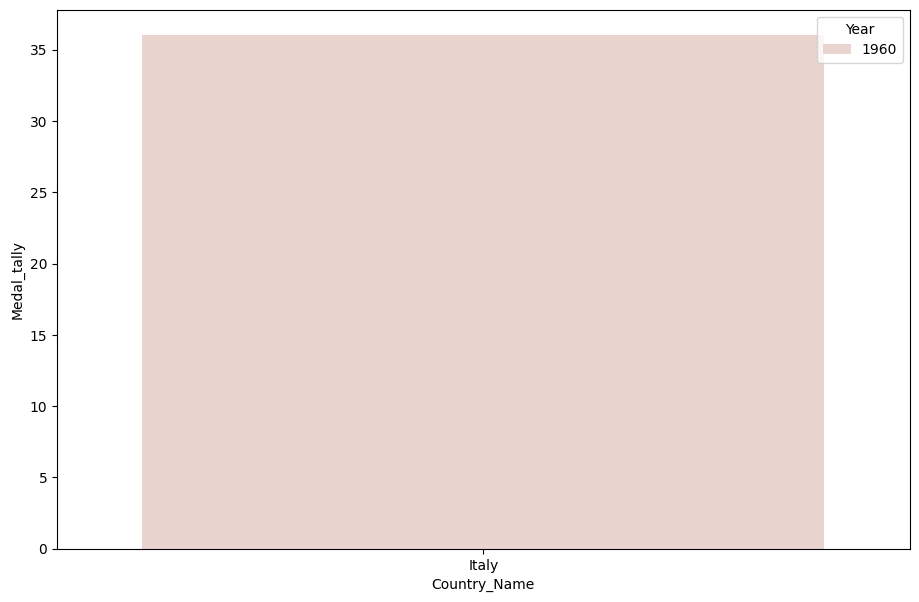

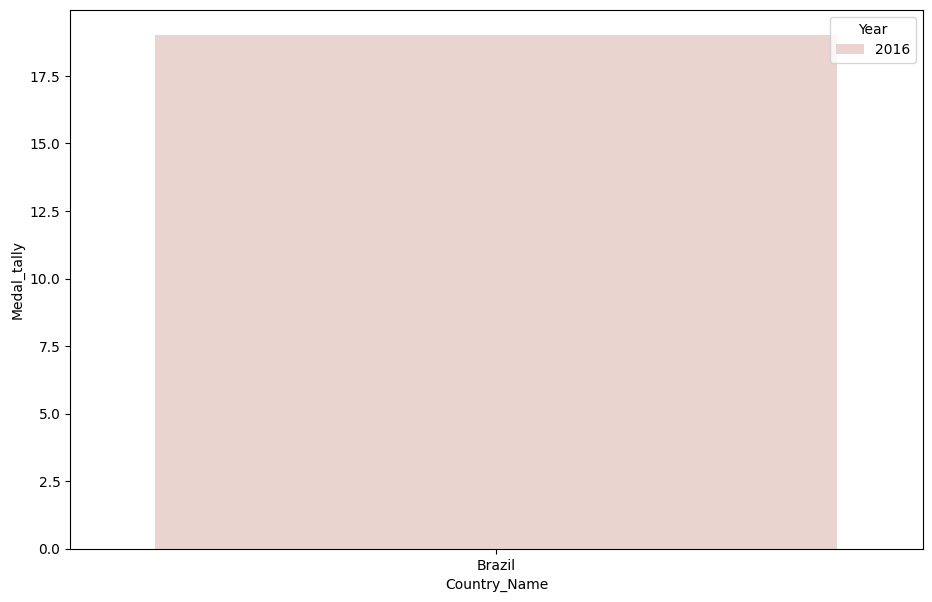

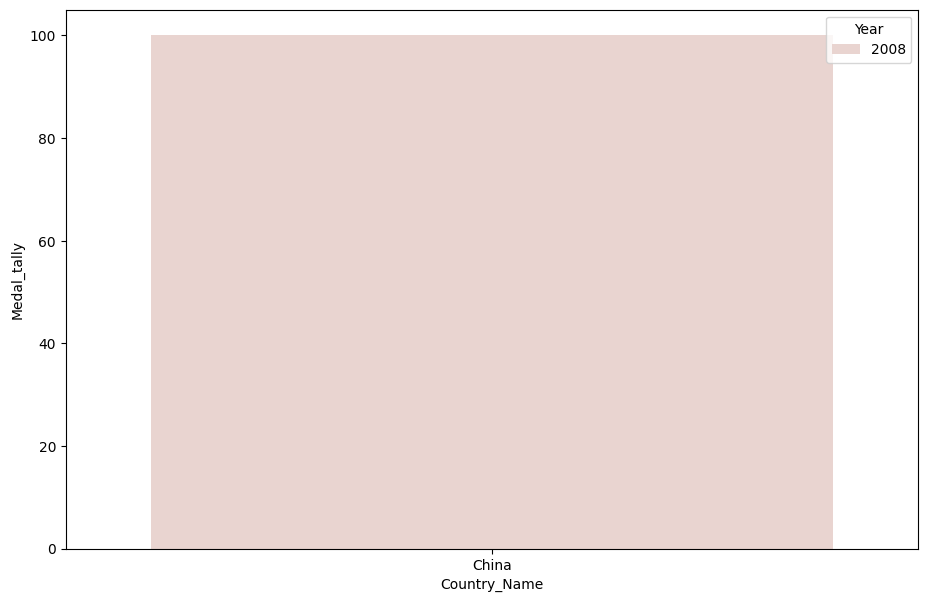

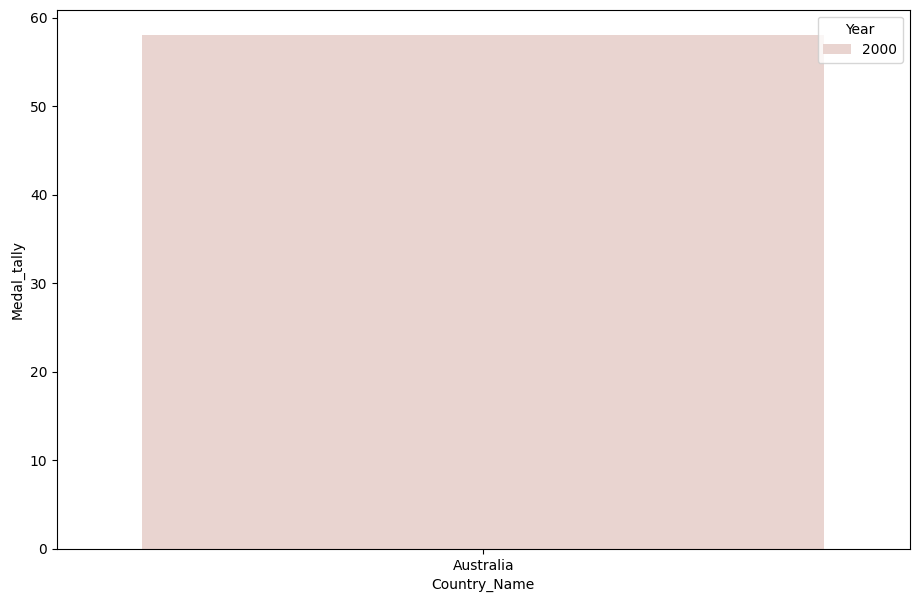

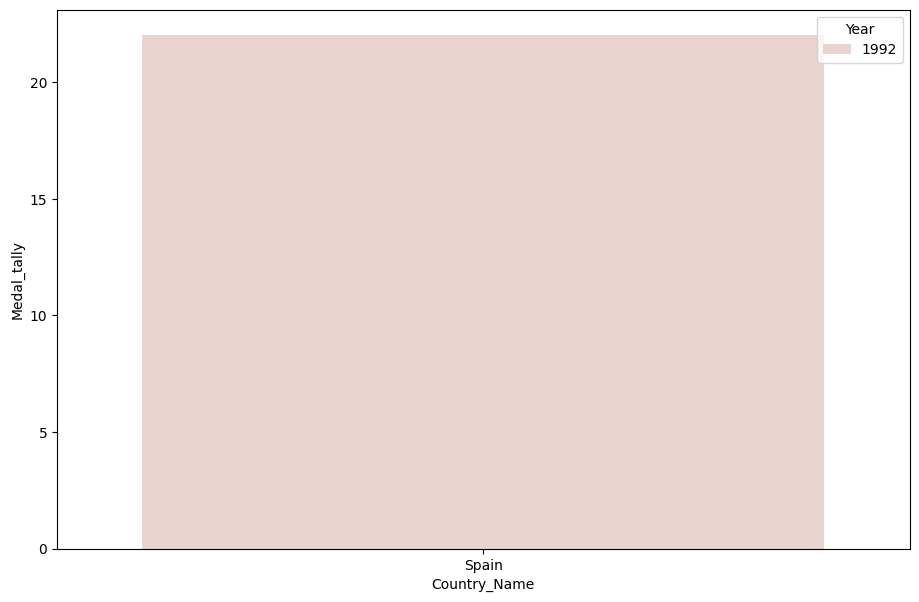

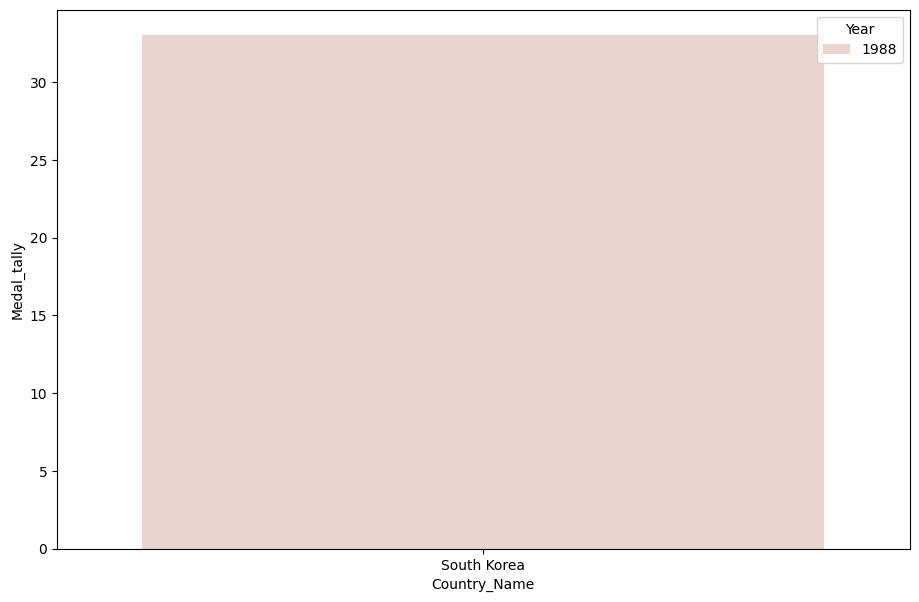

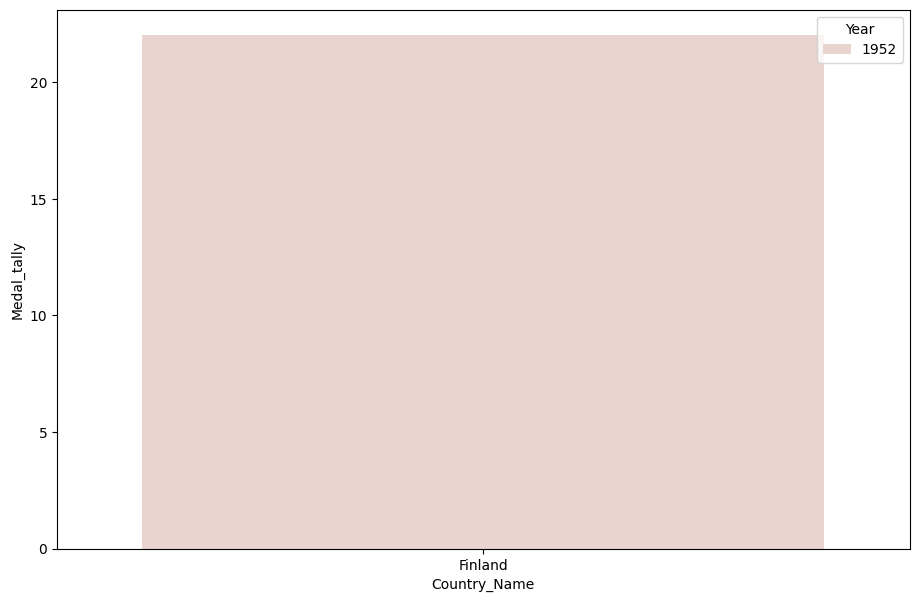

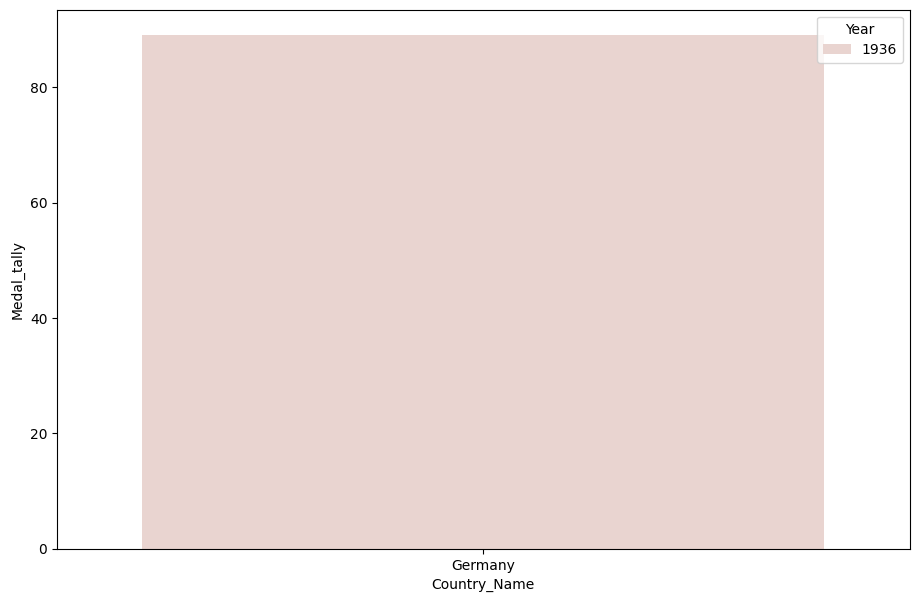

In [11]:
## Medals total vs Year - Country Wise

def draw_barplot_for_each_country(countryname,host_is_home):
    current_df = host_is_home[host_is_home['Country_Name'] == countryname]
    #fig, ax =plt.subplots(1,current_df.shape[0])

    plt.figure(figsize=(11,7))
    sn.barplot(x='Country_Name',y='Medal_tally',data=current_df,hue='Year')

names = host_is_home['Country_Name'].unique()
for each_country in names:
    draw_barplot_for_each_country(each_country,host_is_home)

In [12]:
host_is_home

,Year,Country_Code,Country_Name,Host_city,Host_country,Gold,Silver,Bronze,Medal_tally
0,1932,(USA),United States,Los Angeles,United States,41,32,30,103
34,1928,(NED),Netherlands,Amsterdam,Netherlands,6,9,4,19
62,1924,(FRA),France,Paris,France,13,15,10,38
89,1920,(BEL),Belgium,Antwerp,Belgium,16,12,14,42
110,1912,(SWE),Sweden,Stockholm,Sweden,24,24,17,65
128,1908,(GBR),Great Britain,London,Great Britain,56,51,39,146
147,1904,(USA),United States,St. Louis,United States,76,78,77,231
160,1900,(FRA),France,Paris,France,27,38,37,102
182,1896,(GRE),Greece,Athens,Greece,10,18,19,47
192,1984,(USA),United States,Los Angeles,United States,83,61,30,174


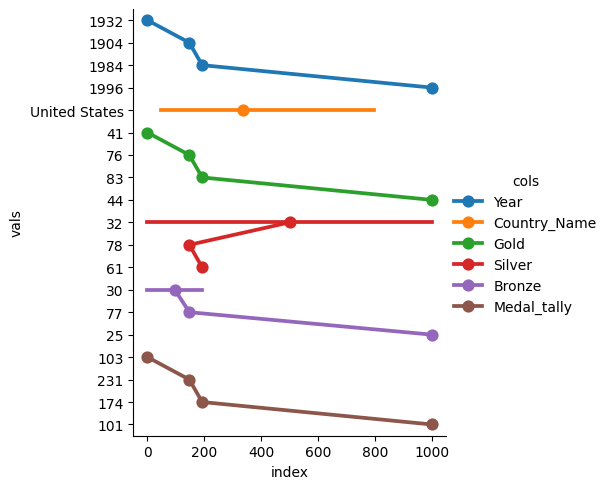

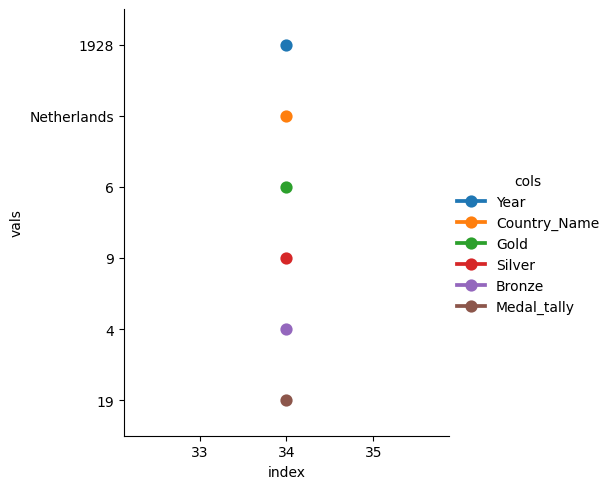

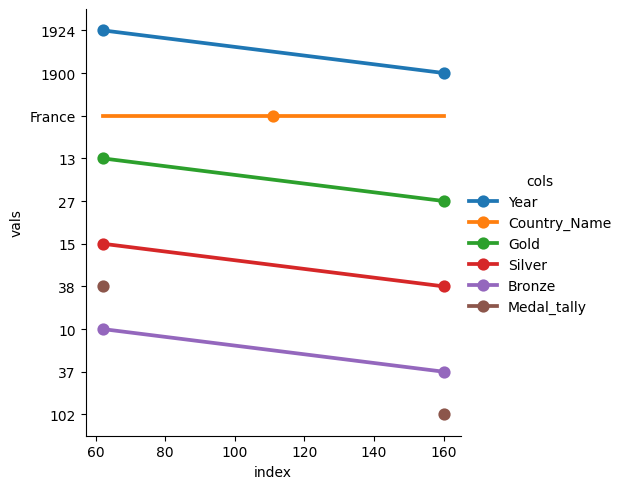

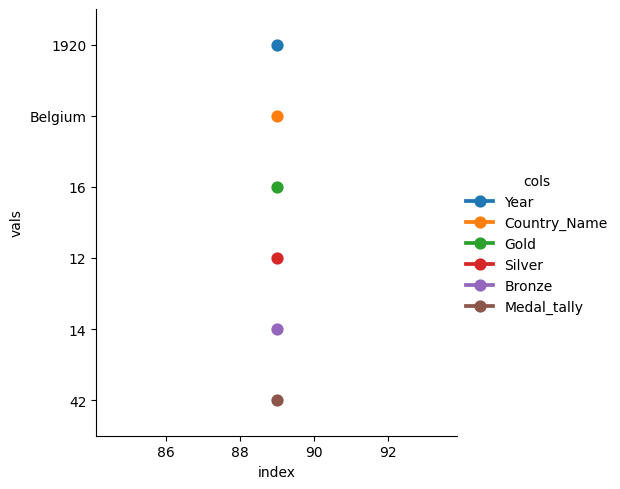

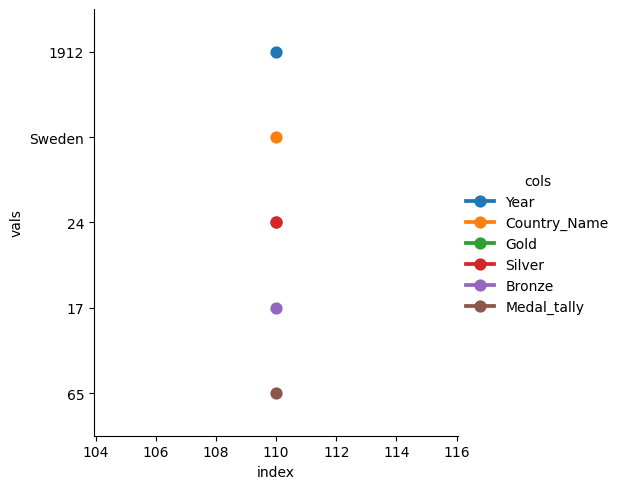

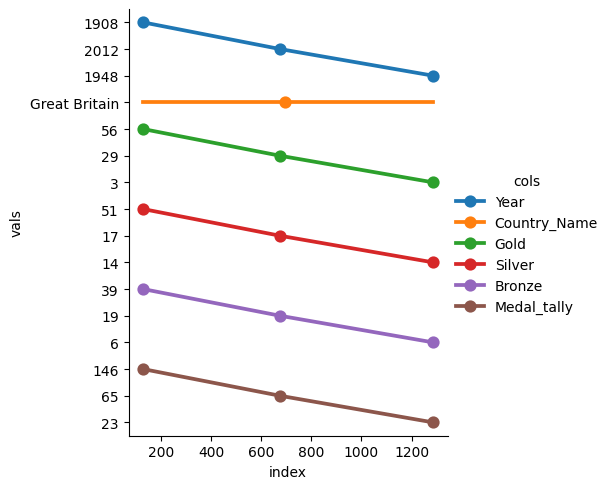

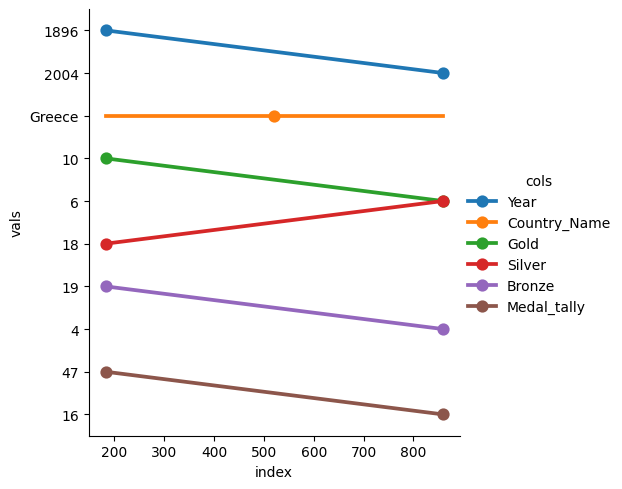

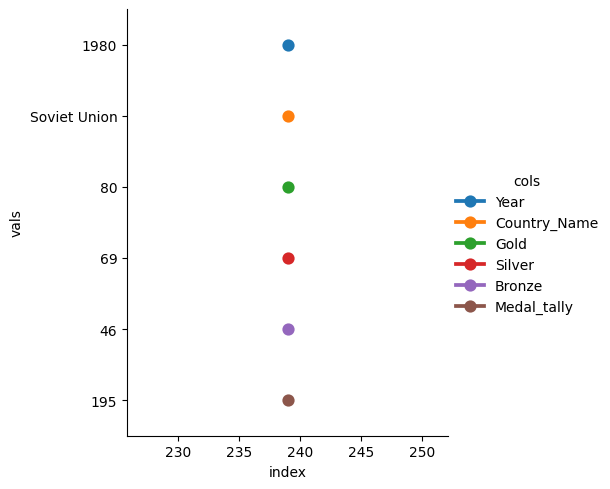

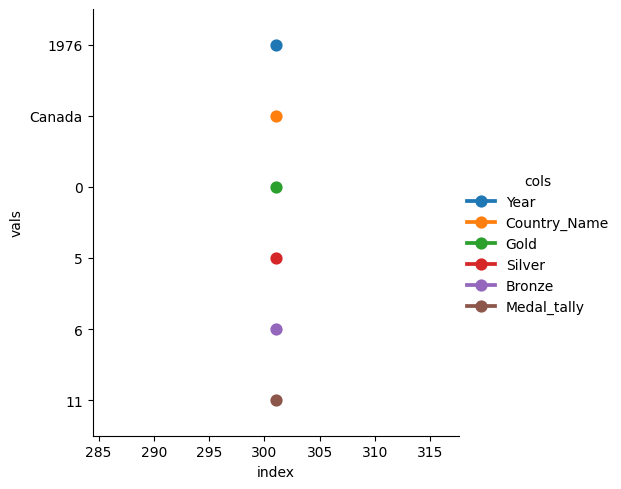

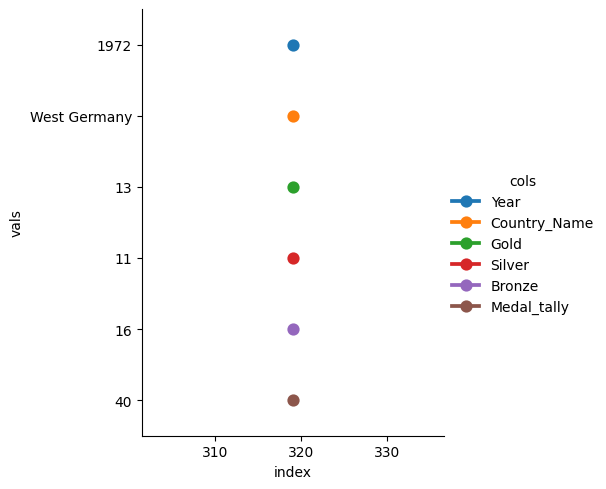

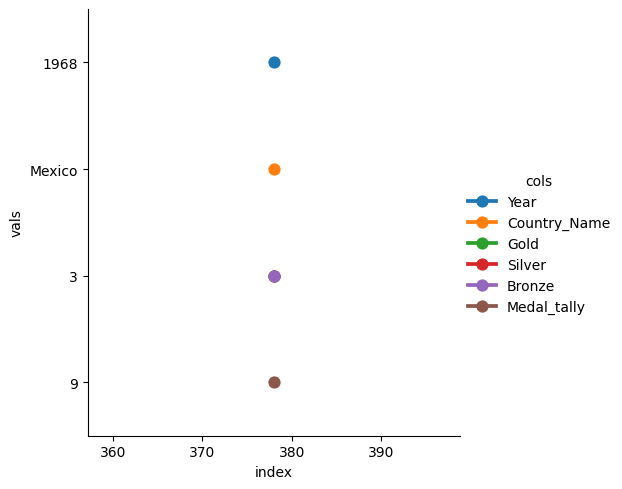

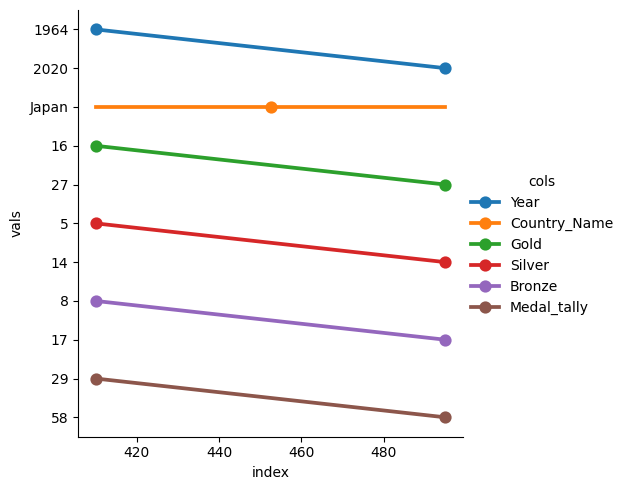

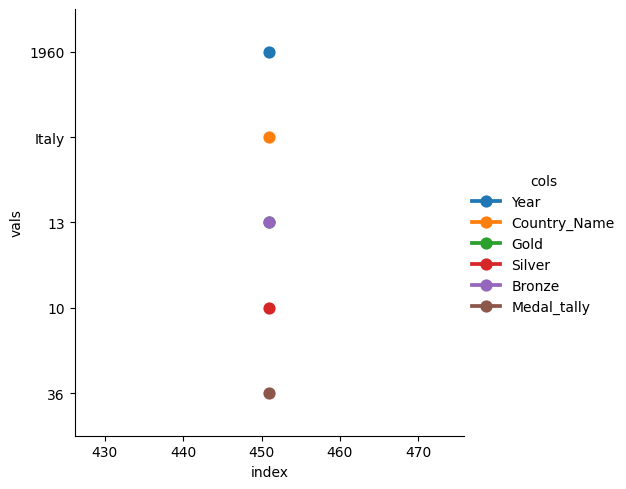

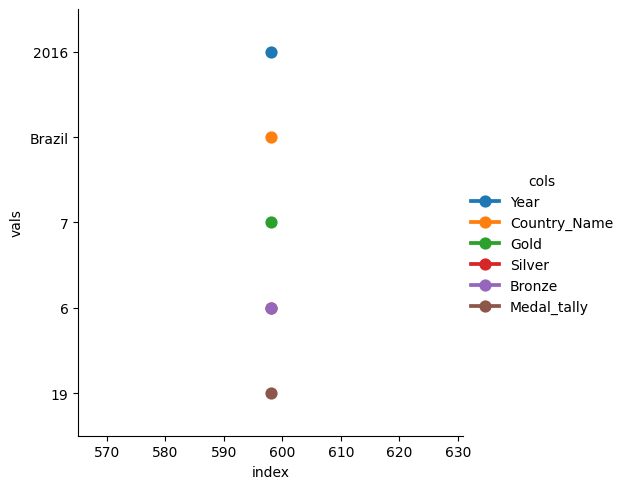

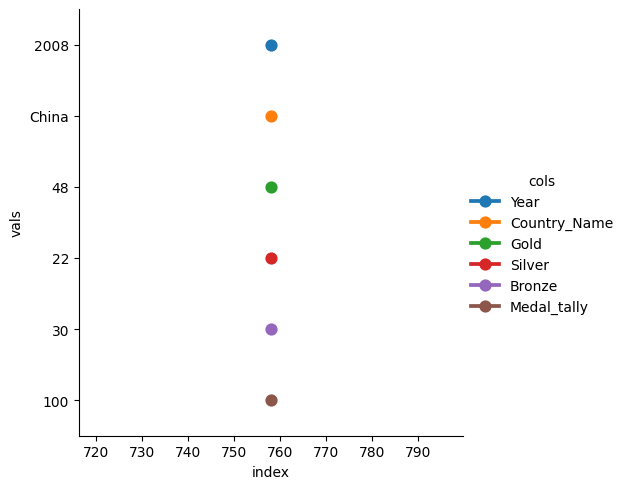

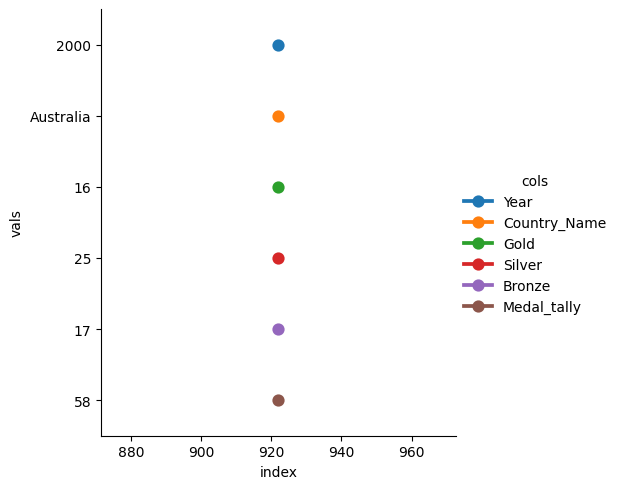

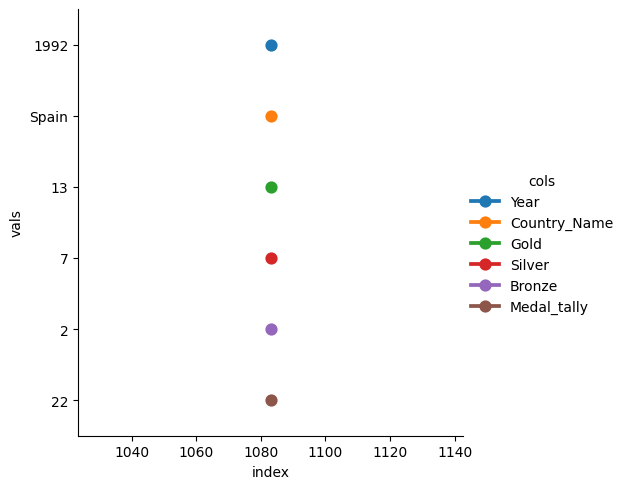

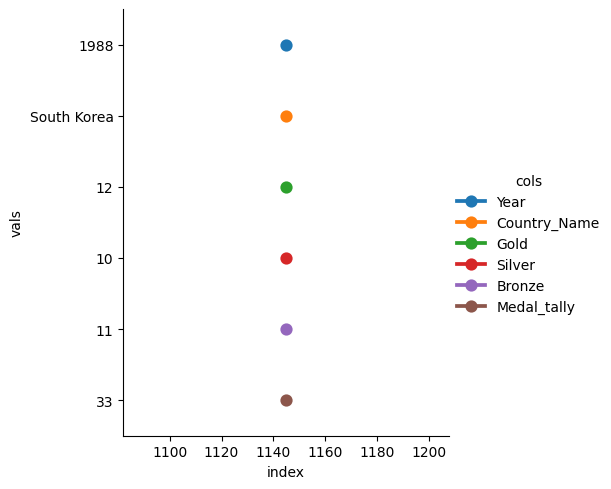

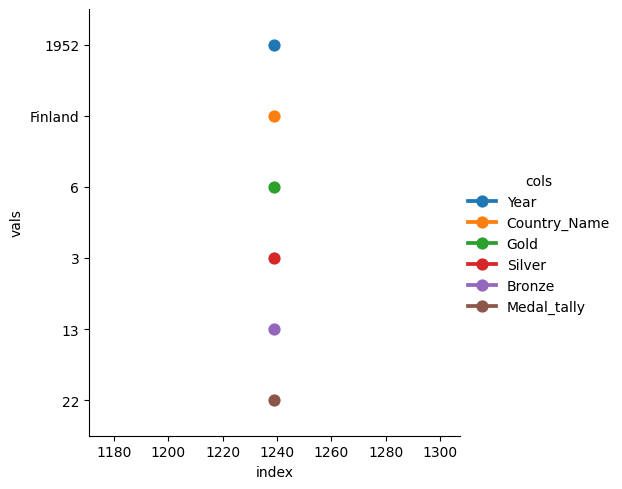

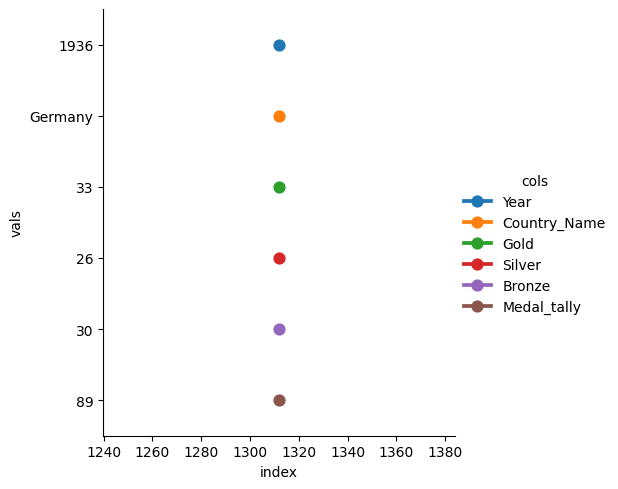

In [13]:
## Gold - Silver - Bronze vs Year - Country Wise

def draw_gsb_barplot_for_each_country(countryname,host_is_home):
    cfilter_df = host_is_home[host_is_home['Country_Name'] == countryname]
    current_df = cfilter_df.drop(columns=['Country_Code','Host_city','Host_country'])

    df = current_df.reset_index().melt('index', var_name='cols',  value_name='vals')
    sn.catplot(x="index", y="vals", hue='cols', data=df, kind='point')

#names = host_is_home['Country_Name'].unique()
for each_country in names:
    draw_gsb_barplot_for_each_country(each_country,host_is_home)

In [14]:
# A bit of a vague representation ? need some enhancements to hue-line pointers.